## Construcción de curva de tasas de interés ##

Un **bono** es un préstamo a la entidad emisora de deuda.  En un bono tradicional (bono bullet), el emisor de deuda paga al comprador del bono flujos periódicos de interés (llamados **cupones**), durante la vigencia de la deuda; adicionalmente al vencimiento se reintegra el monto prestado. 

En la emisión de un bono, deben especificarse los siguientes puntos: 
- Plazo de la deuda, term to maturity. 
- Tipo de cupón: fijo o flotante. 
- Tasa de referencia en caso de pagar cupón flotante (Cetes, TIIE, etc.) 
- 𝑐: Tasa cupón si se trata de cupón fijo, o sobretasa de cupón si se trata de cupón flotante. 
- 𝑚: Numero de cupones pagados en el año. Fracción de año = (1/𝑚) 
- 𝑁: Valor Nominal, regularmente igual a 100. 
- Amortización: A vencimiento (bullet) o bajo algún esquema de decremento o aumento del principal. 

![Bonos Gub](bonos_mex.png)

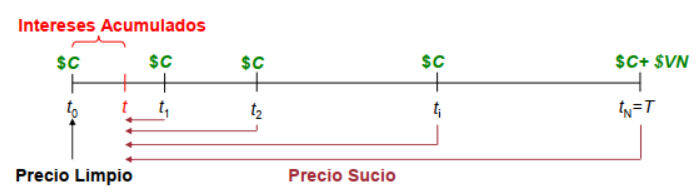

**Precio CETES:**  
$ PV = \large \frac {VN}{1+r*n/360} $  

**Precio MBONO:**  
![Precio MBONO](precio_mbono.png)

## Construcción de Curva Yield ##
**Bootstrapping**: Método para extraer tasas cupón cero a partir de instrumentos cuponados

# Análisis de datos inicial # 

In [10]:
import pandas as pd

In [5]:
# leemos datos de bonos
df = pd.read_csv("bond_market_data.csv")
df.head()

,Rend Ask al vencimiento,Rend Bid al vencimiento,Nombre,Ticker,Cupón,Vencimiento,Tipo de vencimiento,País/región,Divisa,Identificador,Ráting Composite Bloomberg,Ask,Fuente
0,8.809605,8.000000,Mexican Bonos,MBONO,7.50,5/26/2033,AT MATURITY,MX,MXN,ZN7935812,BBB,91.409,BGN
1,8.822815,8.852957,Mexican Bonos,MBONO,7.75,5/29/2031,AT MATURITY,MX,MXN,EI8047355,BBB,93.943,BGN
2,8.889836,8.915060,Mexican Bonos,MBONO,7.75,NaN,AT MATURITY,MX,MXN,EJ1291206,BBB,89.497,BGN
3,8.770626,8.811427,Mexican Bonos,MBONO,8.00,5/24/2035,AT MATURITY,MX,MXN,ZJ8065048,BBB,94.334,BVAL
4,9.585235,9.627325,Mexican Bonos,MBONO,5.75,3/5/2026,AT MATURITY,MX,MXN,QJ1649335,BBB,91.206,BGN


In [6]:
df.tail()

,Rend Ask al vencimiento,Rend Bid al vencimiento,Nombre,Ticker,Cupón,Vencimiento,Tipo de vencimiento,País/región,Divisa,Identificador,Ráting Composite Bloomberg,Ask,Fuente
112,11.556606,11.645280,Mexico Cetes,MCET,0.0,1/25/2024,AT MATURITY,MX,MXN,ZJ9757684,NaN,9.448,BVAL
113,11.731267,11.815167,Mexico Cetes,MCET,0.0,10/26/2023,AT MATURITY,MX,MXN,ZJ9757718,NaN,9.712,BVAL
114,11.349306,11.446230,Mexico Cetes,MCET,0.0,10/12/2023,AT MATURITY,MX,MXN,ZJ7042188,NaN,9.760,BVAL
115,11.659248,11.684866,Mexico Cetes,MCET,0.0,12/28/2023,AT MATURITY,MX,MXN,ZJ1207571,NaN,9.522,BGN
116,11.357313,11.409635,Mexico Cetes,MCET,0.0,6/27/2024,AT MATURITY,MX,MXN,ZJ1207662,NaN,9.039,BGN


In [13]:
df

,Rend Ask al vencimiento,Rend Bid al vencimiento,Nombre,Ticker,Cupón,Vencimiento,Tipo de vencimiento,País/región,Divisa,Identificador,Ráting Composite Bloomberg,Ask,Fuente
0,8.809605,8.000000,Mexican Bonos,MBONO,7.50,5/26/2033,AT MATURITY,MX,MXN,ZN7935812,BBB,91.409,BGN
1,8.822815,8.852957,Mexican Bonos,MBONO,7.75,5/29/2031,AT MATURITY,MX,MXN,EI8047355,BBB,93.943,BGN
2,8.889836,8.915060,Mexican Bonos,MBONO,7.75,NaN,AT MATURITY,MX,MXN,EJ1291206,BBB,89.497,BGN
3,8.770626,8.811427,Mexican Bonos,MBONO,8.00,5/24/2035,AT MATURITY,MX,MXN,ZJ8065048,BBB,94.334,BVAL
4,9.585235,9.627325,Mexican Bonos,MBONO,5.75,3/5/2026,AT MATURITY,MX,MXN,QJ1649335,BBB,91.206,BGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,11.556606,11.645280,Mexico Cetes,MCET,0.00,1/25/2024,AT MATURITY,MX,MXN,ZJ9757684,NaN,9.448,BVAL
113,11.731267,11.815167,Mexico Cetes,MCET,0.00,10/26/2023,AT MATURITY,MX,MXN,ZJ9757718,NaN,9.712,BVAL
114,11.349306,11.446230,Mexico Cetes,MCET,0.00,10/12/2023,AT MATURITY,MX,MXN,ZJ7042188,NaN,9.760,BVAL
115,11.659248,11.684866,Mexico Cetes,MCET,0.00,12/28/2023,AT MATURITY,MX,MXN,ZJ1207571,NaN,9.522,BGN


In [7]:
df["Nombre"].value_counts()

Mexican Fixed Rate Bond Strip        39
Mexico Cetes                         38
Mexican Bonos                        30
Mexican Fixed Rate Bond Principal    10
Name: Nombre, dtype: int64

In [19]:
df[df["Nombre"].isin(("Mexico Cetes", "Mexican Bonos"))]

,Rend Ask al vencimiento,Rend Bid al vencimiento,Nombre,Ticker,Cupón,Vencimiento,Tipo de vencimiento,País/región,Divisa,Identificador,Ráting Composite Bloomberg,Ask,Fuente
0,8.809605,8.000000,Mexican Bonos,MBONO,7.50,5/26/2033,AT MATURITY,MX,MXN,ZN7935812,BBB,91.409,BGN
1,8.822815,8.852957,Mexican Bonos,MBONO,7.75,5/29/2031,AT MATURITY,MX,MXN,EI8047355,BBB,93.943,BGN
2,8.889836,8.915060,Mexican Bonos,MBONO,7.75,NaN,AT MATURITY,MX,MXN,EJ1291206,BBB,89.497,BGN
3,8.770626,8.811427,Mexican Bonos,MBONO,8.00,5/24/2035,AT MATURITY,MX,MXN,ZJ8065048,BBB,94.334,BVAL
4,9.585235,9.627325,Mexican Bonos,MBONO,5.75,3/5/2026,AT MATURITY,MX,MXN,QJ1649335,BBB,91.206,BGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,11.556606,11.645280,Mexico Cetes,MCET,0.00,1/25/2024,AT MATURITY,MX,MXN,ZJ9757684,NaN,9.448,BVAL
113,11.731267,11.815167,Mexico Cetes,MCET,0.00,10/26/2023,AT MATURITY,MX,MXN,ZJ9757718,NaN,9.712,BVAL
114,11.349306,11.446230,Mexico Cetes,MCET,0.00,10/12/2023,AT MATURITY,MX,MXN,ZJ7042188,NaN,9.760,BVAL
115,11.659248,11.684866,Mexico Cetes,MCET,0.00,12/28/2023,AT MATURITY,MX,MXN,ZJ1207571,NaN,9.522,BGN


In [20]:
# Seleccionar únicamentes CETES y MBONOS para nuestra curva de tasas de interés
bonos_bootstrap = df.loc[(df["Nombre"] == "Mexico Cetes") | (df["Nombre"] == "Mexican Bonos")]
bonos_bootstrap

,Rend Ask al vencimiento,Rend Bid al vencimiento,Nombre,Ticker,Cupón,Vencimiento,Tipo de vencimiento,País/región,Divisa,Identificador,Ráting Composite Bloomberg,Ask,Fuente
0,8.809605,8.000000,Mexican Bonos,MBONO,7.50,5/26/2033,AT MATURITY,MX,MXN,ZN7935812,BBB,91.409,BGN
1,8.822815,8.852957,Mexican Bonos,MBONO,7.75,5/29/2031,AT MATURITY,MX,MXN,EI8047355,BBB,93.943,BGN
2,8.889836,8.915060,Mexican Bonos,MBONO,7.75,NaN,AT MATURITY,MX,MXN,EJ1291206,BBB,89.497,BGN
3,8.770626,8.811427,Mexican Bonos,MBONO,8.00,5/24/2035,AT MATURITY,MX,MXN,ZJ8065048,BBB,94.334,BVAL
4,9.585235,9.627325,Mexican Bonos,MBONO,5.75,3/5/2026,AT MATURITY,MX,MXN,QJ1649335,BBB,91.206,BGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,11.556606,11.645280,Mexico Cetes,MCET,0.00,1/25/2024,AT MATURITY,MX,MXN,ZJ9757684,NaN,9.448,BVAL
113,11.731267,11.815167,Mexico Cetes,MCET,0.00,10/26/2023,AT MATURITY,MX,MXN,ZJ9757718,NaN,9.712,BVAL
114,11.349306,11.446230,Mexico Cetes,MCET,0.00,10/12/2023,AT MATURITY,MX,MXN,ZJ7042188,NaN,9.760,BVAL
115,11.659248,11.684866,Mexico Cetes,MCET,0.00,12/28/2023,AT MATURITY,MX,MXN,ZJ1207571,NaN,9.522,BGN


In [28]:
# Seleccionamos columnas a utilizar
data_bonos = bonos_bootstrap.iloc[:, [0,1,2,4,5]]
data_bonos

,Rend Ask al vencimiento,Rend Bid al vencimiento,Nombre,Cupón,Vencimiento
0,8.809605,8.000000,Mexican Bonos,7.50,5/26/2033
1,8.822815,8.852957,Mexican Bonos,7.75,5/29/2031
2,8.889836,8.915060,Mexican Bonos,7.75,NaN
3,8.770626,8.811427,Mexican Bonos,8.00,5/24/2035
4,9.585235,9.627325,Mexican Bonos,5.75,3/5/2026
...,...,...,...,...,...
112,11.556606,11.645280,Mexico Cetes,0.00,1/25/2024
113,11.731267,11.815167,Mexico Cetes,0.00,10/26/2023
114,11.349306,11.446230,Mexico Cetes,0.00,10/12/2023
115,11.659248,11.684866,Mexico Cetes,0.00,12/28/2023


In [33]:
# Creamos una nueva columna a partir de las ya existentes
data_bonos['Rend Mid'] = (data_bonos["Rend Ask al vencimiento"] + data_bonos["Rend Bid al vencimiento"]) / 2
data_bonos

C:\Users\PatricioGarcia\AppData\Local\Temp\ipykernel_5040\2526761248.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_bonos['Rend Mid'] = (data_bonos["Rend Ask al vencimiento"] + data_bonos["Rend Bid al vencimiento"]) / 2


,Rend Ask al vencimiento,Rend Bid al vencimiento,Nombre,Cupón,Vencimiento,Rend Mid
0,8.809605,8.000000,Mexican Bonos,7.50,5/26/2033,8.404803
1,8.822815,8.852957,Mexican Bonos,7.75,5/29/2031,8.837886
2,8.889836,8.915060,Mexican Bonos,7.75,NaN,8.902448
3,8.770626,8.811427,Mexican Bonos,8.00,5/24/2035,8.791026
4,9.585235,9.627325,Mexican Bonos,5.75,3/5/2026,9.606280
...,...,...,...,...,...,...
112,11.556606,11.645280,Mexico Cetes,0.00,1/25/2024,11.600943
113,11.731267,11.815167,Mexico Cetes,0.00,10/26/2023,11.773217
114,11.349306,11.446230,Mexico Cetes,0.00,10/12/2023,11.397768
115,11.659248,11.684866,Mexico Cetes,0.00,12/28/2023,11.672057


In [36]:
# Eliminamos columnas que no vamos a utilizar
data_bonos_2 = data_bonos.drop(['Rend Ask al vencimiento', "Rend Bid al vencimiento"], axis=1)
data_bonos_2

,Nombre,Cupón,Vencimiento,Rend Mid
0,Mexican Bonos,7.50,5/26/2033,8.404803
1,Mexican Bonos,7.75,5/29/2031,8.837886
2,Mexican Bonos,7.75,NaN,8.902448
3,Mexican Bonos,8.00,5/24/2035,8.791026
4,Mexican Bonos,5.75,3/5/2026,9.606280
...,...,...,...,...
112,Mexico Cetes,0.00,1/25/2024,11.600943
113,Mexico Cetes,0.00,10/26/2023,11.773217
114,Mexico Cetes,0.00,10/12/2023,11.397768
115,Mexico Cetes,0.00,12/28/2023,11.672057


<AxesSubplot: ylabel='Frequency'>

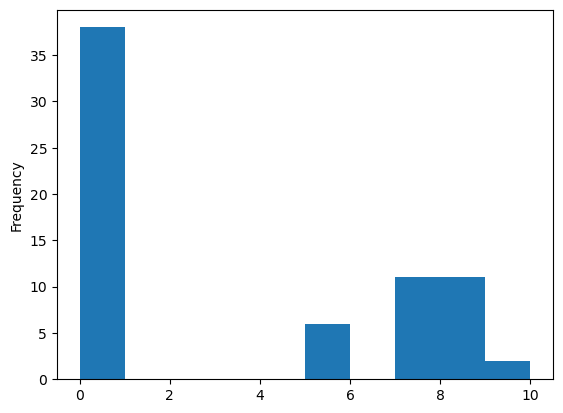

In [46]:
# Verificamos la distribución de nuestros datos
data_bonos_2["Cupón"].plot(kind='hist')

<AxesSubplot: ylabel='Frequency'>

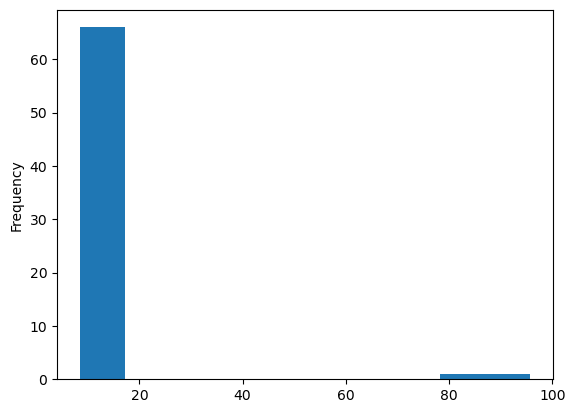

In [47]:
data_bonos_2["Rend Mid"].plot(kind='hist')

In [50]:
data_bonos_2[data_bonos_2["Rend Mid"] > 20]

,Nombre,Cupón,Vencimiento,Rend Mid
80,Mexico Cetes,0.0,7/27/2023,95.777677
83,Mexico Cetes,0.0,8/3/2023,85.131734


<AxesSubplot: ylabel='Frequency'>

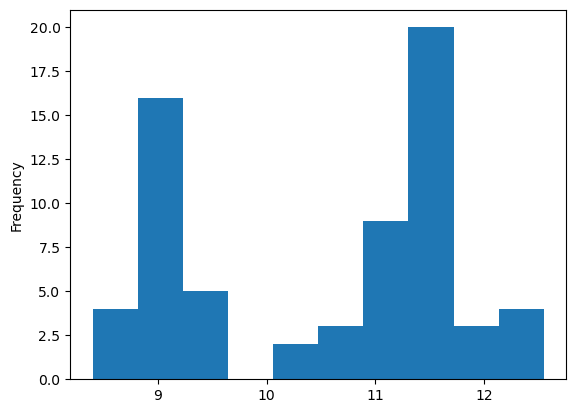

In [51]:
# Eliminar outliers de nuestros datos
data_bonos_2 = data_bonos_2[data_bonos_2["Rend Mid"] < 20]
data_bonos_2["Rend Mid"].plot(kind='hist')

In [54]:
# Verificar los tipos de datos
data_bonos_2.dtypes

Nombre          object
Cupón          float64
Vencimiento     object
Rend Mid       float64
dtype: object

In [56]:
# Queremos que vencimiento sea un tipo de dato 'datetime'
data_bonos_2.Vencimiento

0       5/26/2033
1       5/29/2031
2             NaN
3       5/24/2035
4        3/5/2026
          ...    
112     1/25/2024
113    10/26/2023
114    10/12/2023
115    12/28/2023
116     6/27/2024
Name: Vencimiento, Length: 66, dtype: object

In [57]:
# Verificamos por datos nulos
data_bonos_2.isna().sum()

Nombre         0
Cupón          0
Vencimiento    5
Rend Mid       0
dtype: int64

In [61]:
# Eliminamos los datos nulos
data_bonos_2 = data_bonos_2.dropna(axis=0)
data_bonos_2

,Nombre,Cupón,Vencimiento,Rend Mid
0,Mexican Bonos,7.50,5/26/2033,8.404803
1,Mexican Bonos,7.75,5/29/2031,8.837886
3,Mexican Bonos,8.00,5/24/2035,8.791026
4,Mexican Bonos,5.75,3/5/2026,9.606280
5,Mexican Bonos,7.50,6/3/2027,9.230454
...,...,...,...,...
112,Mexico Cetes,0.00,1/25/2024,11.600943
113,Mexico Cetes,0.00,10/26/2023,11.773217
114,Mexico Cetes,0.00,10/12/2023,11.397768
115,Mexico Cetes,0.00,12/28/2023,11.672057


In [64]:
data_bonos_2["Vencimiento"] = pd.to_datetime(data_bonos_2.Vencimiento, format='%m/%d/%Y')
data_bonos_2.dtypes

C:\Users\PatricioGarcia\AppData\Local\Temp\ipykernel_5040\3441680421.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_bonos_2["Vencimiento"] = pd.to_datetime(data_bonos_2.Vencimiento, format='%m/%d/%Y')


Nombre                 object
Cupón                 float64
Vencimiento    datetime64[ns]
Rend Mid              float64
dtype: object

In [65]:
data_bonos_2

,Nombre,Cupón,Vencimiento,Rend Mid
0,Mexican Bonos,7.50,2033-05-26,8.404803
1,Mexican Bonos,7.75,2031-05-29,8.837886
3,Mexican Bonos,8.00,2035-05-24,8.791026
4,Mexican Bonos,5.75,2026-03-05,9.606280
5,Mexican Bonos,7.50,2027-06-03,9.230454
...,...,...,...,...
112,Mexico Cetes,0.00,2024-01-25,11.600943
113,Mexico Cetes,0.00,2023-10-26,11.773217
114,Mexico Cetes,0.00,2023-10-12,11.397768
115,Mexico Cetes,0.00,2023-12-28,11.672057


In [70]:
fecha_valuacion = pd.to_datetime('2023-07-24')
data_bonos_2["Dias a Venc"] = (data_bonos_2.Vencimiento - fecha_valuacion).astype("timedelta64[D]").astype(int)
data_bonos_2

,Nombre,Cupón,Vencimiento,Rend Mid,Dias a Venc
0,Mexican Bonos,7.50,2033-05-26,8.404803,3594
1,Mexican Bonos,7.75,2031-05-29,8.837886,2866
3,Mexican Bonos,8.00,2035-05-24,8.791026,4322
4,Mexican Bonos,5.75,2026-03-05,9.606280,955
5,Mexican Bonos,7.50,2027-06-03,9.230454,1410
...,...,...,...,...,...
112,Mexico Cetes,0.00,2024-01-25,11.600943,185
113,Mexico Cetes,0.00,2023-10-26,11.773217,94
114,Mexico Cetes,0.00,2023-10-12,11.397768,80
115,Mexico Cetes,0.00,2023-12-28,11.672057,157


In [73]:
data_bonos_2.loc[data_bonos_2["Nombre"].notna()]

,Nombre,Cupón,Vencimiento,Rend Mid,Dias a Venc
0,Mexican Bonos,7.50,2033-05-26,8.404803,3594
1,Mexican Bonos,7.75,2031-05-29,8.837886,2866
3,Mexican Bonos,8.00,2035-05-24,8.791026,4322
4,Mexican Bonos,5.75,2026-03-05,9.606280,955
5,Mexican Bonos,7.50,2027-06-03,9.230454,1410
...,...,...,...,...,...
112,Mexico Cetes,0.00,2024-01-25,11.600943,185
113,Mexico Cetes,0.00,2023-10-26,11.773217,94
114,Mexico Cetes,0.00,2023-10-12,11.397768,80
115,Mexico Cetes,0.00,2023-12-28,11.672057,157


In [ ]:
##########
# pasar de data_bonos_2 a una lista de Bond
# ordenar la lista de Bond
# iterar y sacar el df para la curva de cada bono
##########

# Implementación # 

In [47]:
class MarketData:
    def __init__(self, ruta_archivo, fecha):
        self.ruta_archivo = ruta_archivo
        self.fecha = fecha
        self.data = None
        self.instrumentos = None
    
    def leer_datos(self):
        df = pd.read_csv(self.ruta_archivo)
        df = df[df["Nombre"].isin(("Mexico Cetes", "Mexican Bonos"))]
        df = df.iloc[:, [0,1,2,4,5]]
        df['Rend Mid'] = (df["Rend Ask al vencimiento"] + df["Rend Bid al vencimiento"]) / 2
        df = df[df["Rend Mid"] < 20]
        df = df.drop(['Rend Ask al vencimiento', "Rend Bid al vencimiento"], axis=1)
        df = df.dropna(axis=0)
        df["Vencimiento"] = pd.to_datetime(df.Vencimiento, format='%m/%d/%Y')
        df["Plazo a Venc"] = (df.Vencimiento - self.fecha).astype("timedelta64[D]").astype(int)
        df = df.reset_index(drop=True)
        self.data = df
    
    def leer_base_datos(self):
        ####
        ### conectarse y ejecutar querys
        ####
        # self.data = df
    
    def inicializar_instrumentos(self):
        num_instrumentos = len(self.data)
        instrumentos = []
        for i in range(len(self.data)):
            if self.data['Cupón'].iloc[i] == 0:
                instrumentos.append(ZeroCouponBond('CETES', 10, self.data.loc[i,'Rend Mid'],
                                                   self.data.loc[i,'Plazo a Venc']))
            else:
                instrumentos.append(CouponBond('MBONO', 100, self.data.loc[i,'Rend Mid'],
                                               self.data.loc[i,'Plazo a Venc'], 182, self.data.loc[i,'Cupón']))
        self.instrumentos = instrumentos
    
    def ordenar_instrumentos(self):
        self.instrumentos = sorted(self.instrumentos, key=Bond.get_dias_venc)

In [68]:
class Bond:
    def __init__(self, tipo_bono, valor_nominal, tasa_rend, dias_venc):
        self.tipo_bono = tipo_bono
        self.valor_nominal = valor_nominal
        self.tasa_rend = tasa_rend
        self.dias_venc = dias_venc
    
    def valuar(self):
        raise NotImplemented
    
    def get_dias_venc(self):
        return self.dias_venc
    
    def __repr__(self):
        return self.tipo_bono + " " + str(self.dias_venc) + "D"

    
class ZeroCouponBond(Bond):
    def valuar(self, curva_desc):
        print()

        
class CouponBond(Bond):
    def __init__(self, tipo_bono, valor_nominal, tasa_rend, dias_venc, freq_cupon, tasa_cupon):
        super().__init__(tipo_bono, valor_nominal, tasa_rend, dias_venc)
        self.freq_cupon = freq_cupon
        self.tasa_cupon = tasa_cupon
        
    def valuar(self, curva_desc):
        print()

In [79]:
import scipy.optimize import fsolve

class Curva:
    def __init__(self, t=[], df=[]):
        self.tiempo = t
        self.df = df
    
    def construir(self, lista_instrumentos):
        # 1. Iterar sobre instrumentos
        # 2.a Si es ZeroCouponBond entonces agregar df a self.df
        # 2.b Si es CouponBond entonces utilizamos fsolve para encontrar la
        #     tasa cero equivalente
        pass
    
    def interpolar(self):
        # Interpolacion lineal en factores de descuento
        # Interpolacion lineal en tasas de interes
        # Interpolacion splines en tasas de interes
        pass

In [69]:
# 1. Crear una instancia de market data
market_data_bloomberg = MarketData("bond_market_data.csv", pd.to_datetime('2023-07-24'))
print(market_data_bloomberg)
print(market_data_bloomberg.ruta_archivo)
print(market_data_bloomberg.fecha)
print(market_data_bloomberg.data)
print(market_data_bloomberg.instrumentos)

# 2. Leer datos e inicializar los instrumentos
market_data_bloomberg.leer_datos()
print()
print(market_data_bloomberg.data)
market_data_bloomberg.inicializar_instrumentos()
print(market_data_bloomberg.instrumentos)

bond_market_data.csv
2023-07-24 00:00:00
None
None

           Nombre  Cupón Vencimiento   Rend Mid  Plazo a Venc
0   Mexican Bonos   7.50  2033-05-26   8.404803          3594
1   Mexican Bonos   7.75  2031-05-29   8.837886          2866
2   Mexican Bonos   8.00  2035-05-24   8.791026          4322
3   Mexican Bonos   5.75  2026-03-05   9.606280           955
4   Mexican Bonos   7.50  2027-06-03   9.230454          1410
..            ...    ...         ...        ...           ...
56   Mexico Cetes   0.00  2024-01-25  11.600943           185
57   Mexico Cetes   0.00  2023-10-26  11.773217            94
58   Mexico Cetes   0.00  2023-10-12  11.397768            80
59   Mexico Cetes   0.00  2023-12-28  11.672057           157
60   Mexico Cetes   0.00  2024-06-27  11.383474           339

[61 rows x 5 columns]
[MBONO 3594D, MBONO 2866D, MBONO 4322D, MBONO 955D, MBONO 1410D, MBONO 10965D, MBONO 2138D, MBONO 591D, MBONO 1137D, MBONO 1319D, MBONO 500D, MBONO 5596D, MBONO 8753D, MBONO 4140D, 

In [70]:
market_data_bloomberg.ordenar_instrumentos()
print(market_data_bloomberg.instrumentos)

[CETES 17D, CETES 24D, CETES 31D, CETES 38D, CETES 45D, CETES 52D, CETES 59D, CETES 66D, CETES 73D, CETES 80D, CETES 80D, CETES 87D, CETES 94D, CETES 100D, CETES 115D, CETES 129D, MBONO 136D, CETES 143D, CETES 157D, CETES 157D, CETES 171D, CETES 185D, CETES 199D, CETES 227D, CETES 255D, CETES 283D, CETES 311D, CETES 339D, CETES 339D, CETES 367D, MBONO 409D, CETES 437D, CETES 493D, MBONO 500D, CETES 549D, CETES 563D, MBONO 591D, MBONO 591D, CETES 605D, CETES 661D, CETES 717D, MBONO 955D, MBONO 955D, MBONO 1137D, MBONO 1319D, MBONO 1319D, MBONO 1410D, MBONO 2138D, MBONO 2138D, MBONO 2866D, MBONO 2866D, MBONO 2866D, MBONO 2866D, MBONO 3594D, MBONO 3594D, MBONO 4140D, MBONO 4322D, MBONO 4868D, MBONO 5596D, MBONO 8753D, MBONO 10965D]


In [74]:
market_data_bloomberg.data.loc[market_data_bloomberg.data["Plazo a Venc"] == 500]

,Nombre,Cupón,Vencimiento,Rend Mid,Plazo a Venc
10,Mexican Bonos,10.0,2024-12-05,10.553722,500


In [75]:
# VN * TC * T
100 * 0.10 * (182/360)

5.055555555555555

In [76]:
market_data_bloomberg.data.loc[market_data_bloomberg.data["Plazo a Venc"] == 136]

,Nombre,Cupón,Vencimiento,Rend Mid,Plazo a Venc
15,Mexican Bonos,8.0,2023-12-07,11.481716,136


In [77]:
# Factor de descuento de 136D
1 / (1 + 0.11481716 * (136/360))

0.9584278364833475

In [ ]:
# 3. Construir curva de tasas de interes a partir de bonos
# Para el MBONO 500D
# Recibiriamos VN + C ($105.05) en 500D
# Recibiriamos C ($5.05) en 318D <- Interpolar!
# Recibiriamos C ($5.05) en 136D

In [81]:
curva_bonos = Curva()
curva_bonos.tiempo

[]

In [82]:
curva_bonos.df

[]

In [ ]:
curva_bonos.construir(market_data_bloomberg.instrumentos)